In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [109]:
import pickle
# 导入向量化后的数据集
np_vectorized_tfidf = pickle.load(open('vectorized_generated_corpus_tfidf.pkl', 'rb'))

In [110]:
np_vectorized_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17705395, 0.1748451 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21242656,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
np_vectorized_tfidf.shape

(1200, 48)

In [22]:
np_vectorized_tfidf.dtype

dtype('float64')

In [111]:
# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = np_vectorized_tfidf,
                                      batch_size = 32,
                                      shuffle = True)

In [112]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 48 ==> 2
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(48, 24),
            torch.nn.ReLU(),
            torch.nn.Linear(24, 12),
            torch.nn.ReLU(),
            torch.nn.Linear(12, 6),
            torch.nn.ReLU(),
            torch.nn.Linear(6, 3),
            torch.nn.ReLU(),
            torch.nn.Linear(3, 2)
        ).double() # Change parameters dtype to double
        
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 2 ==> 48
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(2, 3),
            torch.nn.ReLU(),
            torch.nn.Linear(3, 6),
            torch.nn.ReLU(),
            torch.nn.Linear(6, 12),
            torch.nn.ReLU(),
            torch.nn.Linear(12, 24),
            torch.nn.ReLU(),
            torch.nn.Linear(24, 48),
            # torch.nn.Sigmoid()
        ).double() # Change parameters dtype to double

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return (encoded, decoded) # encoded is the result of dimensionality reduction

In [113]:
# Model Initialization
model = AE()
model.cuda()  # move the model to GPU

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.01
optimizer = torch.optim.Adam(model.parameters(),
							lr = 0.01,
							weight_decay = 0.00000001)

In [114]:
epochs = 100
iters = 0
outputs = []
losses = []

for epoch in range(1, epochs + 1):
    print('Epoch:', epoch)
    for essay in loader:
        iters += 1

        essay = essay.cuda()  # move data to GPU

        # Output of Autoencoder
        _, reconstructed = model(essay)

        # Calculating the loss function
        loss = loss_function(reconstructed, essay)

        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.item())
        if iters % 100 == 0:
            print(f"Iteration: {iters}, loss is: {loss.item()}")

    outputs.append((epoch, essay, reconstructed))

Epoch: 1
Epoch: 2
Epoch: 3
Iteration: 100, loss is: 0.0171382913696628
Epoch: 4
Epoch: 5
Epoch: 6
Iteration: 200, loss is: 0.015527409835239226
Epoch: 7
Epoch: 8
Iteration: 300, loss is: 0.014877908609941226
Epoch: 9
Epoch: 10
Epoch: 11
Iteration: 400, loss is: 0.01393547576013351
Epoch: 12
Epoch: 13
Epoch: 14
Iteration: 500, loss is: 0.014409751817226993
Epoch: 15
Epoch: 16
Iteration: 600, loss is: 0.013754014504694479
Epoch: 17
Epoch: 18
Epoch: 19
Iteration: 700, loss is: 0.013431245553019219
Epoch: 20
Epoch: 21
Epoch: 22
Iteration: 800, loss is: 0.013571185897319097
Epoch: 23
Epoch: 24
Iteration: 900, loss is: 0.013036661061501942
Epoch: 25
Epoch: 26
Epoch: 27
Iteration: 1000, loss is: 0.01311479306615507
Epoch: 28
Epoch: 29
Iteration: 1100, loss is: 0.01236588384352492
Epoch: 30
Epoch: 31
Epoch: 32
Iteration: 1200, loss is: 0.014089817840482664
Epoch: 33
Epoch: 34
Epoch: 35
Iteration: 1300, loss is: 0.012612699139605835
Epoch: 36
Epoch: 37
Iteration: 1400, loss is: 0.01313253688617

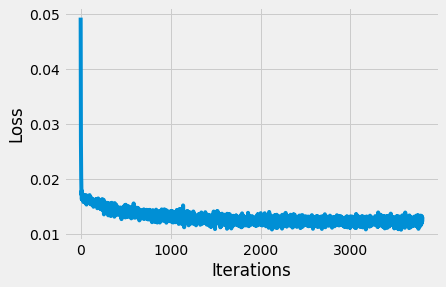

In [115]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)

In [116]:
outputs[-1]

(100,
 tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.1113, 0.0000, 0.1118, 0.0000, 0.1089,
          0.0000, 0.0000, 0.0000, 0.2223, 0.1095, 0.0000, 0.2444, 0.2380, 0.0000,
          0.0000, 0.2444, 0.0000, 0.0000, 0.4813, 0.4660, 0.2380, 0.0000, 0.4693,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.1768, 0.0000, 0.0000, 0.0000, 0.1622, 0.0000,
          0.0000, 0.0000, 0.0000, 0.1086, 0.1077, 0.0000, 0.0000, 0.1074, 0.0000,
          0.3193, 0.0000, 0.1056, 0.1076, 0.2120, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.1709, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6499, 0.5063, 0.1728,
          0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5086, 0.2435, 0.0000,
          0.2525, 0.48

In [120]:
# Dimensionality Reduction by the trained AE model

decomposition_data = []
for essay in np_vectorized_tfidf:
    essay = torch.from_numpy(essay).cuda()
    encoded, decoded = model(essay)
    decomposition_data.append(encoded.cpu().data.numpy())

decomposition_data = np.array(decomposition_data)

In [121]:
decomposition_data

array([[-6.50904509e-01,  8.26942371e-02],
       [-6.93108837e-01,  8.87430061e-02],
       [-6.66060363e-01,  8.48663902e-02],
       ...,
       [ 2.14721598e+01,  9.13968152e-02],
       [ 8.74570258e+00, -1.26824904e-02],
       [ 2.09666846e+01,  8.96958644e-02]])

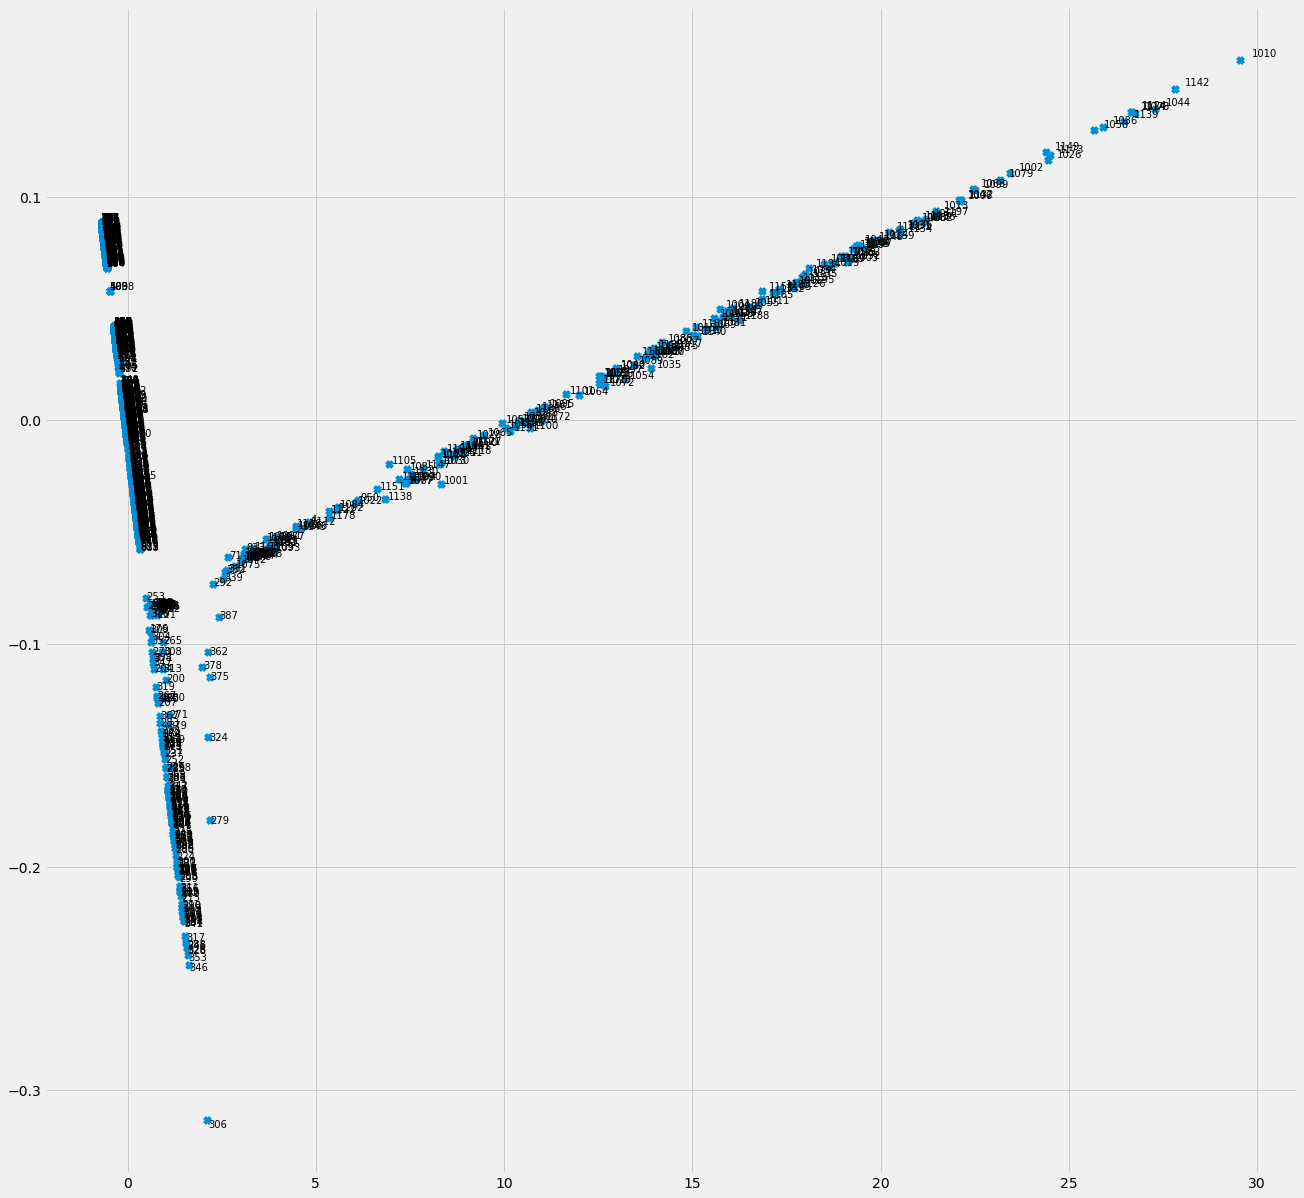

In [122]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data[:, 0], decomposition_data[:, 1], marker='x')
for i in range(len(decomposition_data)):
    plt.text(decomposition_data[:, 0][i] * 1.01, decomposition_data[:, 1][i] * 1.01, i, fontsize=10)
plt.show()

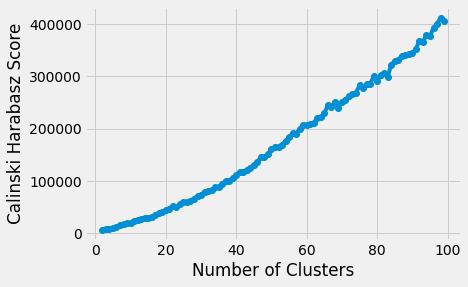

In [123]:
# K-means 算法聚类并利用 Calinski Harabasz Score 评估效果
from sklearn.cluster import KMeans
from sklearn import metrics
calinski_harabasz_score_list = []
for n_cluster in range(2, 100):
    y_pred = KMeans(n_clusters=n_cluster, init='k-means++', random_state=9).fit_predict(decomposition_data)
    current_score = metrics.calinski_harabasz_score(decomposition_data, y_pred)
    calinski_harabasz_score_list.append(current_score)

plt.plot(range(2,100), calinski_harabasz_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

In [124]:
calinski_harabasz_score_list.index(max(calinski_harabasz_score_list))

96

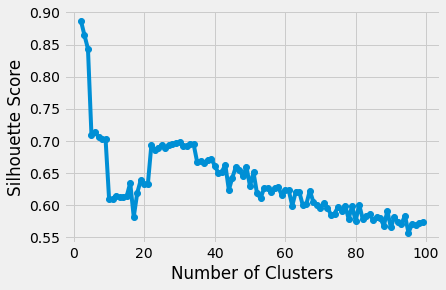

In [125]:
# K-means 算法聚类并利用 Silhouette Score（轮廓系数）评估效果
silhouette_score_list = []
for n_cluster in range(2, 100):
    km = KMeans(n_clusters=n_cluster, random_state=9)
    y_pred = km.fit_predict(decomposition_data)
    current_score = metrics.silhouette_score(decomposition_data, km.labels_ , metric='euclidean')
    silhouette_score_list.append(current_score)

plt.plot(range(2,100), silhouette_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [126]:
silhouette_score_list.index(max(silhouette_score_list))

0

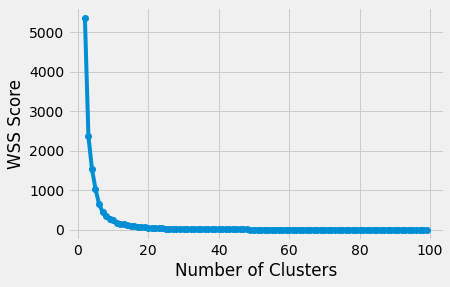

In [127]:
# K-means 算法聚类并利用 WSS（Within-cluster Sum of Squares）评估效果
WSS_score_list = []
for n_cluster in range(2, 100):
    km = KMeans(n_clusters=n_cluster, random_state=9)
    y_pred = km.fit_predict(decomposition_data)
    current_score = km.inertia_
    WSS_score_list.append(current_score)

plt.plot(range(2,100), WSS_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.show()

In [128]:
# 选用 k 值做 K-means 算法聚类
y_pred = KMeans(n_clusters=6, init='k-means++', random_state=9).fit_predict(decomposition_data)

In [129]:
print(y_pred[:10])

[3 3 3 3 0 3 3 3 3 3]


In [130]:
import numpy as np
# 用 dict 统计出所有类别的坐标
y_pred_dict = {}
for i in range(len(decomposition_data)):
    if y_pred[i] not in y_pred_dict:
        y_pred_dict[y_pred[i]] = decomposition_data[i].reshape(1, 2)
    else:
        y_pred_dict[y_pred[i]] = np.vstack((y_pred_dict[y_pred[i]], decomposition_data[i]))

In [131]:
for key, value in y_pred_dict.items():
    print(key, value[:, 0].mean())

3 -0.19917206100702128
0 1.6667196886782536
5 8.615950949593731
2 14.38522891663404
4 25.90972390337535
1 19.58826960436248


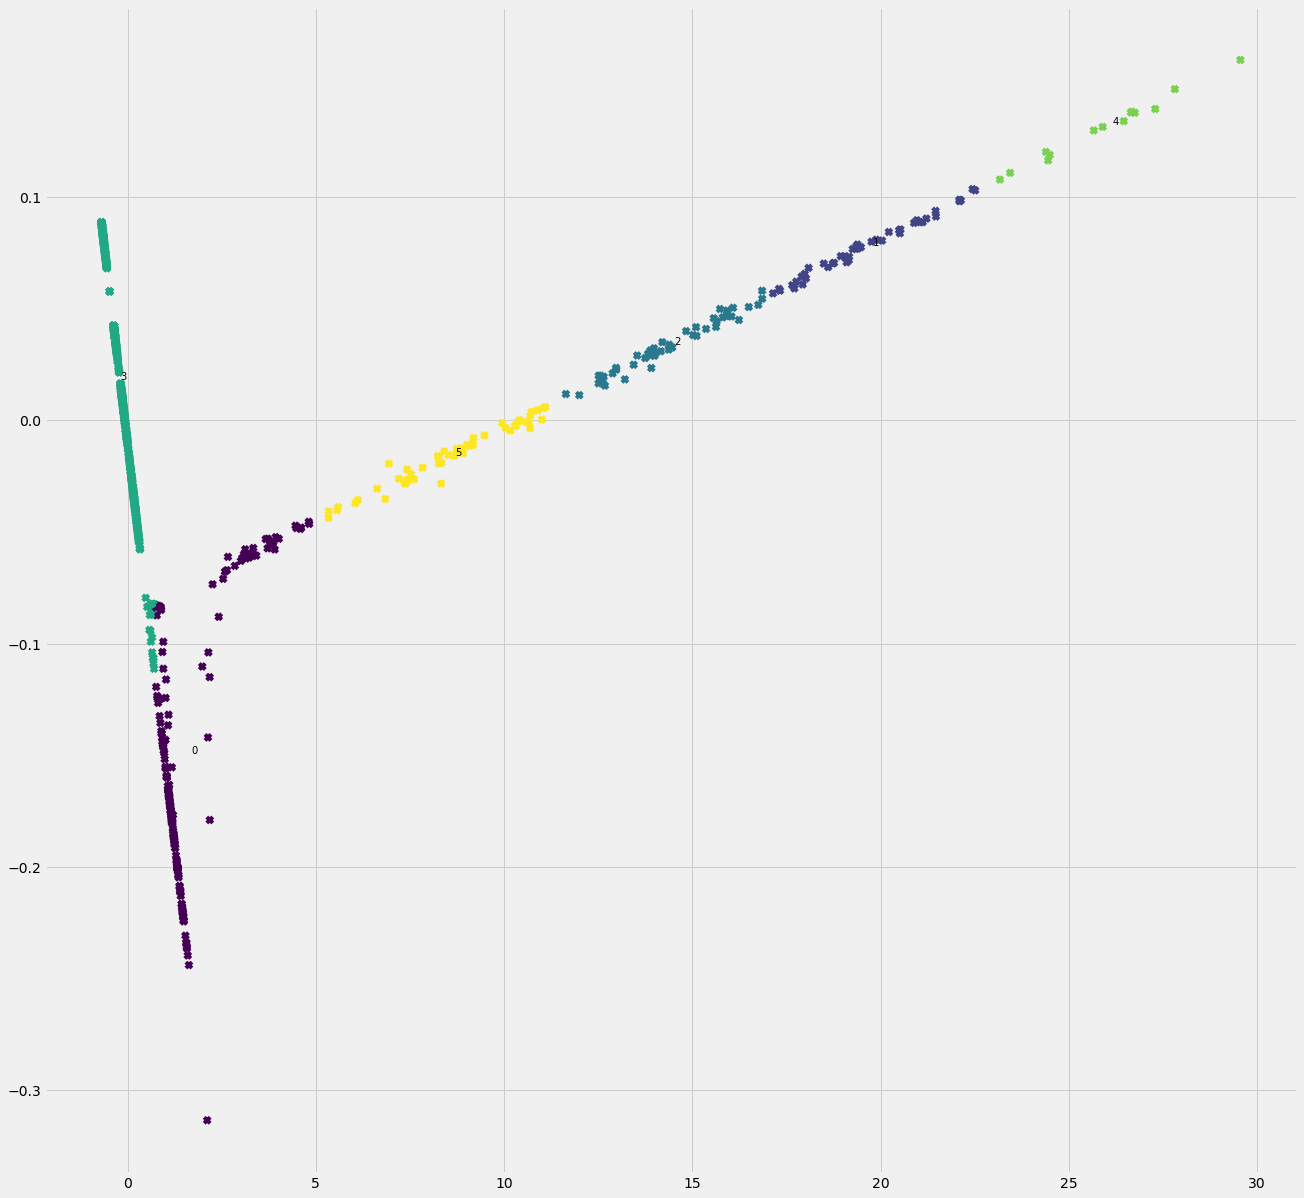

In [132]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data[:, 0], decomposition_data[:, 1], c=y_pred, marker='x')
for key, value in y_pred_dict.items():
    plt.text(value[:, 0].mean() * 1.01, value[:, 1].mean() * 1.01, key, fontsize=10)
plt.show()

In [133]:
# 利用 Calinski Harabasz Score 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.calinski_harabasz_score(decomposition_data, y_pred)

13070.660938913308

In [134]:
# 利用 Silhouette Score（轮廓系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
km = KMeans(n_clusters=6, random_state=9)
y_pred = km.fit_predict(decomposition_data)
metrics.silhouette_score(decomposition_data, km.labels_, metric='euclidean')

0.7131824865264045

In [135]:
# 读入正确标签（Labels）
labels = []
# 读入数据集
with open('sixTypes-GeneratedLabels.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        labels.append(line.strip('\n'))

In [136]:
labels[:10]

['CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP']

In [137]:
# 利用 Homogeneity 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.homogeneity_score(labels, y_pred)

0.3219601356237498

In [138]:
# 利用 Completeness 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.completeness_score(labels, y_pred)

0.5907283579487969

In [139]:
# 利用 V-measure 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.v_measure_score(labels, y_pred)

0.41677085573309464

In [140]:
# 利用 Adjusted Rand Index（调整兰德系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_rand_score(labels, y_pred)

0.1681698799904003

In [141]:
# 利用 Adjusted Mutual Information Score（调整互信息）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_mutual_info_score(labels, y_pred)

0.41214241925880735

In [142]:
# 利用 Fowlkes-Mallows scores 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.fowlkes_mallows_score(labels, y_pred)

0.44482150891046246